In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [21]:
import pandas as pd

# Load your data
togo_df = pd.read_csv('data/togo-dapaong_qc.csv')

# Show summary statistics
print(togo_df.describe())

# Show missing values
print(togo_df.isna().sum())


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

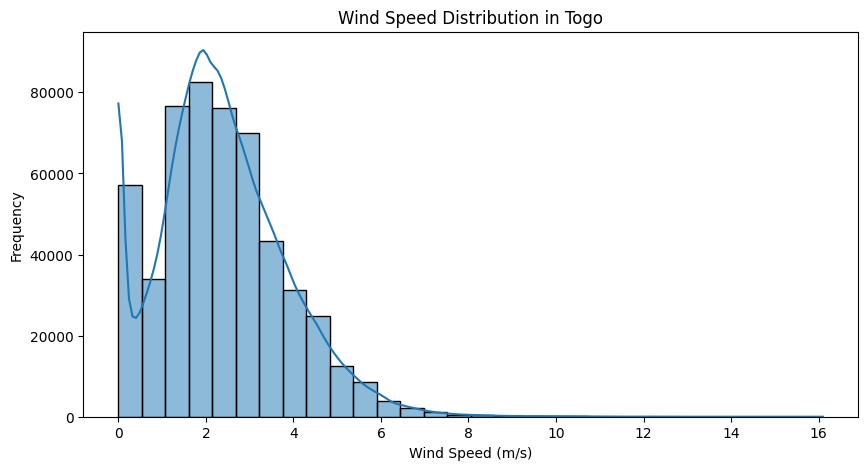

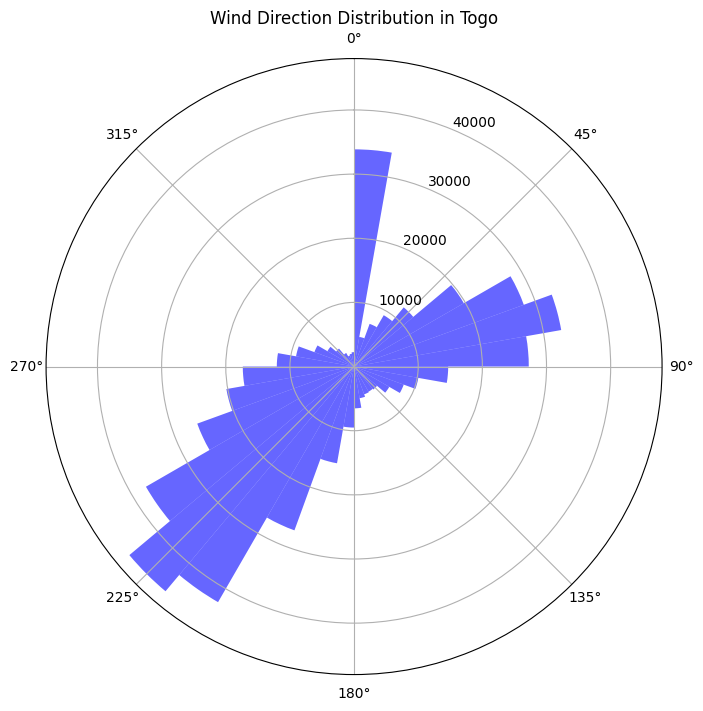

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume togo_df is your cleaned DataFrame with WS and WD columns

# Histogram of Wind Speed (WS)
plt.figure(figsize=(10, 5))
sns.histplot(togo_df['WS'], bins=30, kde=True)
plt.title('Wind Speed Distribution in Togo')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

# Wind Direction as a circular plot (polar plot)
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
# Convert WD from degrees to radians
wd_radians = np.deg2rad(togo_df['WD'].dropna())

# Plot wind direction frequencies
bins = 36  # 10 degree bins
counts, bin_edges = np.histogram(wd_radians, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

ax.bar(bin_centers, counts, width=(2 * np.pi) / bins, bottom=0.0, color='blue', alpha=0.6)
ax.set_theta_zero_location("N")  # 0° at the top
ax.set_theta_direction(-1)       # Clockwise
ax.set_title("Wind Direction Distribution in Togo")
plt.show()




In [6]:
print(togo_df[['GHI', 'DNI', 'DHI']].isnull().sum())

GHI    0
DNI    0
DHI    0
dtype: int64


In [7]:
if 'Comments' in togo_df.columns:
    togo_df = togo_df.drop(columns=['Comments'])

In [9]:
togo_hourly = togo_df.resample('h').mean()

In [12]:
togo_hourly.to_csv('data/togo_hourly.csv')


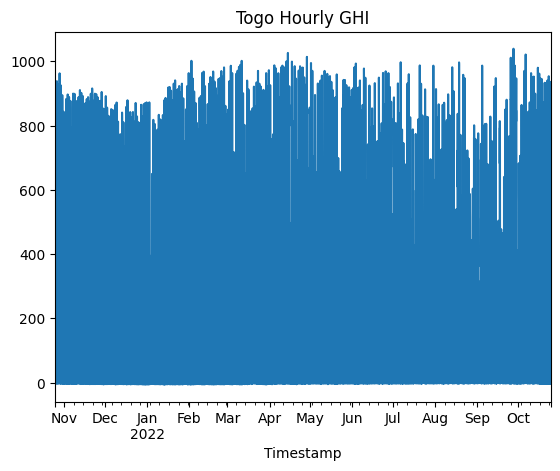

In [13]:
import matplotlib.pyplot as plt

togo_hourly['GHI'].plot(title='Togo Hourly GHI')
plt.show()


In [14]:
print(togo_hourly.head())

                          GHI  DNI  DHI  ModA  ModB       Tamb         RH  \
Timestamp                                                                   
2021-10-25 00:00:00 -0.998305  0.0  0.0   0.0   0.0  25.018644  94.457627   
2021-10-25 01:00:00 -1.070000  0.0  0.0   0.0   0.0  25.165000  94.731667   
2021-10-25 02:00:00 -1.078333  0.0  0.0   0.0   0.0  25.268333  92.431667   
2021-10-25 03:00:00 -1.005000  0.0  0.0   0.0   0.0  25.216667  91.530000   
2021-10-25 04:00:00 -1.040000  0.0  0.0   0.0   0.0  25.255000  90.400000   

                           WS    WSgust   WSstdev          WD   WDstdev  \
Timestamp                                                                 
2021-10-25 00:00:00  1.122034  1.506780  0.383051  224.691525  3.586441   
2021-10-25 01:00:00  0.275000  0.400000  0.148333   77.341667  0.135000   
2021-10-25 02:00:00  0.908333  1.280000  0.350000  189.716667  2.588333   
2021-10-25 03:00:00  1.293333  1.593333  0.378333  220.716667  2.263333   
2021-10-25

In [23]:
# Summary stats
print(togo_df.describe())

# Missing values count
missing_counts = togo_df.isna().sum()
print(missing_counts)

# Percentage missing for each column
missing_percent = (missing_counts / len(togo_df)) * 100
print(missing_percent)

# Columns with more than 5% missing values
cols_gt_5pct_null = missing_percent[missing_percent > 5]
print("Columns with >5% missing values:\n", cols_gt_5pct_null)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

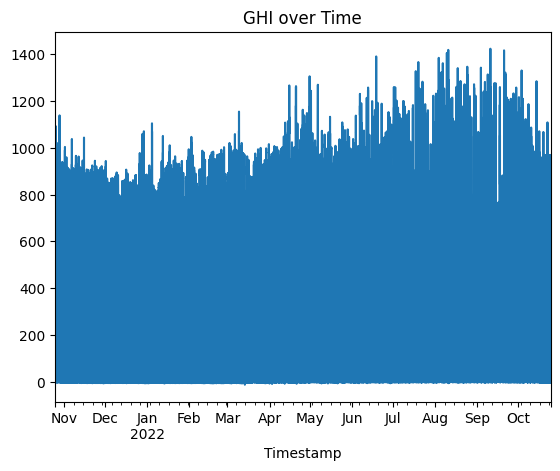

In [22]:
import matplotlib.pyplot as plt

# Simple line plot for GHI over time if you have Timestamp column
togo_df['Timestamp'] = pd.to_datetime(togo_df['Timestamp'])
togo_df.set_index('Timestamp', inplace=True)

togo_df['GHI'].plot(title='GHI over Time')
plt.show()


In [27]:


# Impute missing values with median for key columns
togo_df.loc[:, cols_to_check] = togo_df.loc[:, cols_to_check].fillna(togo_df[cols_to_check].median())

In [29]:
z_scores = np.abs(togo_df[cols_to_check].apply(zscore, nan_policy='omit'))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")


Number of outliers: 9251


In [30]:
togo_df[cols_to_check] = togo_df[cols_to_check].fillna(togo_df[cols_to_check].median())

In [31]:
df_clean = togo_df[~outliers].copy()

In [33]:
togo_df.to_csv('../data/benin_clean.csv', index=True)
print("Cleaned data saved to '../data/togo_clean.csv'")


OSError: Cannot save file into a non-existent directory: '..\data'